In [1]:
import sqlite3                      
import pandas as pd                
import matplotlib.pyplot as plt    


In [2]:
# Step 1: Connect to the database
conn = sqlite3.connect("sales_data.db")

In [3]:
# Step 2: Create sales table (if not exists)
conn.execute("""
CREATE TABLE IF NOT EXISTS sales (
    product TEXT,
    quantity INTEGER,
    price REAL
)
""")

In [4]:
# Step 3: Insert sample data (if table is empty)
cursor = conn.cursor()
cursor.execute("SELECT COUNT(*) FROM sales")
count = cursor.fetchone()[0]

if count == 0:
    sample_data = [
        ('Pen', 10, 5.0),
        ('Notebook', 5, 20.0),
        ('Pencil', 15, 2.0),
        ('Eraser', 20, 1.5),
        ('Marker', 8, 10.0),
        ('Scale', 12, 3.0),
        ('Pen', 7, 5.0),
        ('Notebook', 3, 20.0),
        ('Pencil', 8, 2.0),
        ('Marker', 5, 10.0),
        ('Highlighter', 6, 12.0),
        ('Eraser', 10, 1.5)
    ]
    conn.executemany("INSERT INTO sales (product, quantity, price) VALUES (?, ?, ?)", sample_data)
    conn.commit()


In [6]:
# Step 4: Run SQL query 
query = """
SELECT product, 
       SUM(quantity) AS total_qty, 
       SUM(quantity * price) AS revenue 
FROM sales 
GROUP BY product
"""
df = pd.read_sql_query(query, conn)

In [7]:
# Step 5: Print results 
print("📊 Sales Summary:")
print(df)

📊 Sales Summary:
       product  total_qty  revenue
0       Eraser         30     45.0
1  Highlighter          6     72.0
2       Marker         13    130.0
3     Notebook          8    160.0
4          Pen         17     85.0
5       Pencil         23     46.0
6        Scale         12     36.0


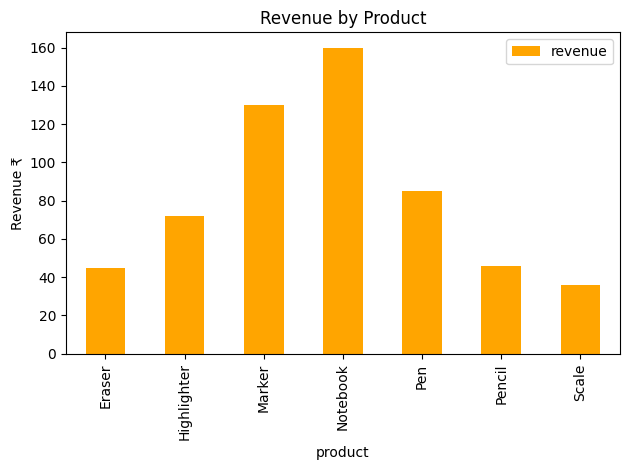

In [8]:
# Step 6: Plot bar chart 
df.plot(kind='bar', x='product', y='revenue', color='orange')
plt.title("Revenue by Product")
plt.ylabel("Revenue ₹")
plt.tight_layout()

In [9]:
# Step 7: Save chart if needed 
plt.savefig("sales_chart.png")
plt.show()

<Figure size 640x480 with 0 Axes>

In [10]:
# Step 8: Close the database
conn.close()